In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib tk
medium_policies = {
10 : np.array([np.array([-266.646 ,    1.5967]), np.array([-253.671 ,    1.3363]), np.array([-98.177 ,  20.1075])]),
0 : np.array([np.array([-395.3,    0. ]), np.array([-499.836,    0.   ]), np.array([-43.622,   0.   ])]),
0.91 : np.array([np.array([-492.09,    0.  ]), np.array([-343.97,    0.  ]), np.array([-102,   0 ])])
}

large_policies = {
    0: np.array([np.array([-499.254,    0.   ]), np.array([-498.181,    0.   ]), np.array([-121.783,   -0.236]), np.array([-498.724,    0.   ]), np.array([-120.271,   -1.08 ])]),
    10: np.array([
        np.array([-3.42889e+02, 4.0e-02]), np.array([-302.995, 0.4911]), np.array([-139.867, 19.4628]), np.array([-258.164, 0.]), np.array([-157.031, 17.1129])])
}


In [2]:
# Function to get the intersection of two lines represented as f(we) = (1-we)*v0 + we*ve for a two given fixed sets of (v0, ve)
def get_intersection(v01, ve1, v02, ve2):
    if ve1 == ve2:
        return 0
    we = (v01 - v02) / (ve2 - ve1)
    return we
# get_intersection(mo_value_w10[2][0], mo_value_w10[2][1], mo_value_w0[2][0], mo_value_w0[2][1])

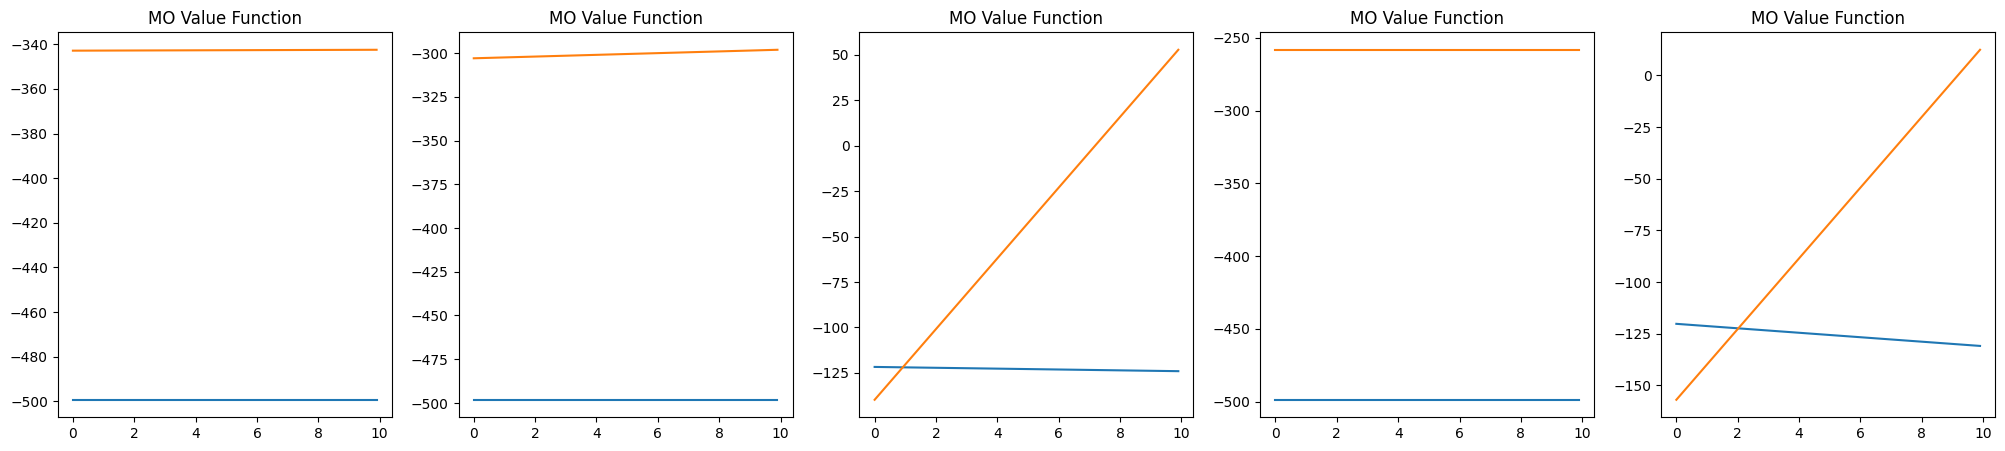

In [3]:
# Plot values as function of weight w that scales the reward
policies = large_policies

fig, axs = plt.subplots(1, policies[0].shape[0], figsize=(25, 5)) 
step = 0.1
# for ag in mo_value_w10:
max_weight = 10
# Subplot for each agent
x = np.arange(0, max_weight, step)
w = np.array([np.ones(int(max_weight/step)), np.arange(0, max_weight, step)])

for ag in range(policies[0].shape[0]):
    axs[ag].set_title("MO Value Function")
    for p in policies.values():
        y = np.dot(p[ag], w)
        axs[ag].plot(x, y)

plt.show()

In [4]:
def get_next_corner():
    wes = []
    p1 = policies[sorted(list(policies.keys()), reverse=True)[0]]
    p2 = policies[sorted(list(policies.keys()), reverse=True)[1]]
    for ag in range(policies[0].shape[0]):
        wes.append(get_intersection(p1[ag][0], p1[ag][1], p2[ag][0], p2[ag][1]))
    print(wes)
    return max(wes)
get_next_corner()

[-3909.125, -397.44654856444714, 0.9180254634800082, 0, 2.020568463521484]


2.020568463521484

In [5]:
ag = 2
p1 = policies[10]
p2 = policies[0]
get_intersection(p1[ag][0], p1[ag][1], p2[ag][0], p2[ag][1])

0.9180254634800082